# 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [6]:
if os.name=='nt':
    !pip install wget
    

  Using cached wget-3.2-py3-none-any.whl


In [5]:
import wget

In [6]:
import object_detection

In [ ]:
labels = [{'name':'beer', 'id':1}, {'name':'boar', 'id':2}, {'name':'cat', 'id':3}, {'name':'cow', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

In [ ]:
labels

In [10]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [12]:
!pip install pandas

     ---------------------------------------- 0.0/247.7 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/247.7 kB 1.3 MB/s eta 0:00:01
     --------------- ---------------------- 102.4/247.7 kB 1.5 MB/s eta 0:00:01
     -------------------------- ----------- 174.1/247.7 kB 1.3 MB/s eta 0:00:01
     -------------------------------------  245.8/247.7 kB 1.5 MB/s eta 0:00:01
     -------------------------------------  245.8/247.7 kB 1.5 MB/s eta 0:00:01
     -------------------------------------  245.8/247.7 kB 1.5 MB/s eta 0:00:01
     ------------------------------------ 247.7/247.7 kB 845.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
    --------------------------------------- 0.1/10.8 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.8 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/10.8 MB 5.0 MB/s eta 0:00:03
   ---- ----------------------------------- 1.3/10.8 MB 6.6 MB/s e

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tf-slim, which is not installed.
tf-models-official 2.15.0 requires Cython, which is not installed.
tf-models-official 2.15.0 requires gin-config, which is not installed.
tf-models-official 2.15.0 requires google-ap

In [16]:
!pip install tensorflow==2.13.0

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.5 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- ---- 51.2/57.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.5/57.5 kB 335.0 kB/s eta 0:00:00
     ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
     ---------------------------------------- 0.1/14.9 MB 1.7 MB/s eta 0:00:09
      --------------------------------------- 0.2/14.9 MB 2.3 MB/s eta 0:00:07
      --------------------------------------- 0.3/14.9 MB 2.0 MB/s eta 0:00:08
     - -------------------------------------- 0.5/14.9 MB 3.0 MB/s eta 0:00:05
     - -------------------------------------- 0.5/14.9 MB 3.0 MB/s eta 0:00:05
     - -------------------------------------- 0.5/14.9 MB 3.0 MB/s eta 0:00:05
     - -------------------------------------- 0.6/14.9 MB 1.9 MB/s eta 0:00:08
     -- ------------------------------------- 0.8/14.9 MB 2.1 M

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pillow, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tf-slim, which is not installed.
sacrebleu 2.2.0 requires colorama, which is not installed.
sacrebleu 2.2.0 requires portalocker, which is not installed.
sacrebleu 2.2.0 requires regex, which is not installed.
sacre

In [19]:
!pip install pillow

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 2.3 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/2.6 MB 1.1 MB/s eta 0:00:03
   --- ------------------------------------ 0.3/2.6 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.4/2.6 MB 1.6 MB/s eta 0:00:02
   --------- ------------------------------ 0.6/2.6 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 1.1/2.6 MB 3.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.6/2.6 MB 4.4 MB/s eta 0:00:01
   ------------------------- -------------- 1.7/2.6 MB 4.5 MB/s eta 0:00:01
   ------------------------------------- -- 2.5/2.6 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  2.6/2.6 MB 5.4 MB/s eta 0:00:01
   ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
object-detection 0.1 requires Cython, which is not installed.
object-detection 0.1 requires lvis, which is not installed.
object-detection 0.1 requires matplotlib, which is not installed.
object-detection 0.1 requires pycocotools, which is not installed.
object-detection 0.1 requires scipy, which is not installed.
object-detection 0.1 requires tf-slim, which is not installed.
tf-models-official 2.15.0 requires Cython, which is not installed.
tf-models-official 2.15.0 requires gin-config, which is not installed.
tf-models-official 2.15.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-offi

In [13]:
!python xml_to_csv1.py -i Tensorflow/workspace/images/train -o Tensorflow/workspace/annotations/train_labels.csv

Successfully converted xml to csv.


In [14]:
!!python xml_to_csv1.py -i Tensorflow/workspace/images/test -o Tensorflow/workspace/annotations/test_labels.csv

['Successfully converted xml to csv.']

In [20]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record


In [21]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


In [7]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [31]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [32]:
config

{'model': ssd {
   num_classes: 4
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-005
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     override_base_feature_extractor_hyperparams: true
     use_depthwise: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10
       x_scale: 10
       height_scale: 5
       width_scale: 5
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
       unmatche

In [25]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config) 

In [26]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [27]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)  

In [ ]:
python Tensorflow\\models\\research\\object_detection\\model_main_tf2.py --model_dir=Tensorflow\\workspace\\models\\my_ssd_mobnet --pipeline_config_path=Tensorflow\\workspace\\models\\my_ssd_mobnet\\pipeline.config --num_train_steps=2000

# 8. Load Train Model From Checkpoint

In [8]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [9]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-13')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [10]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [12]:
category_index

{1: {'id': 1, 'name': 'beer'},
 2: {'id': 2, 'name': 'boar'},
 3: {'id': 3, 'name': 'cat'},
 4: {'id': 4, 'name': 'cow'}}

In [35]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'],'cat4.jpg')

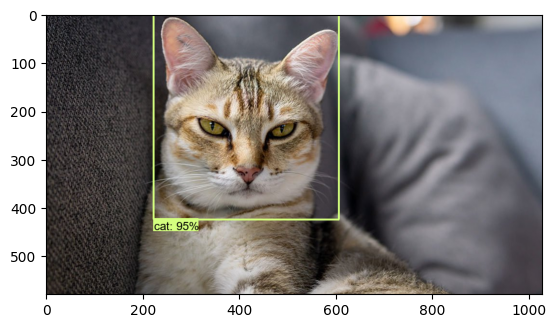

In [36]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()